In [1]:
# https://reurl.cc/DMY9R
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat",
         4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship",
         9:"truck"}

bird


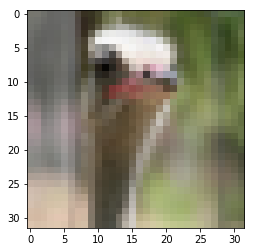

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
print(trans[y_train[c][0]])
plt.imshow(x_train[c])

In [10]:
# https://reurl.cc/DMY9R
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
cnn = Sequential()
# 27(一個filter) * 64 + 64(bias)
cnn.add(Conv2D(64, (3, 3),
               padding="same",
               activation="relu",
               input_shape=(32, 32, 3)))
# 3 * 3 * 64(一個filter) * 128 + 128(bias)
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
___________________________

In [0]:
# https://reurl.cc/DMY9R
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [0]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [12]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 5s - loss: 1.5564 - acc: 0.4365 - val_loss: 1.1946 - val_acc: 0.5758
Epoch 2/10
 - 5s - loss: 1.1069 - acc: 0.6094 - val_loss: 0.9912 - val_acc: 0.6532
Epoch 3/10
 - 5s - loss: 0.9162 - acc: 0.6795 - val_loss: 0.8290 - val_acc: 0.7128
Epoch 4/10
 - 5s - loss: 0.7847 - acc: 0.7282 - val_loss: 0.7653 - val_acc: 0.7374
Epoch 5/10
 - 5s - loss: 0.6756 - acc: 0.7627 - val_loss: 0.7180 - val_acc: 0.7512
Epoch 6/10
 - 5s - loss: 0.5862 - acc: 0.7955 - val_loss: 0.6770 - val_acc: 0.7662
Epoch 7/10
 - 5s - loss: 0.5040 - acc: 0.8235 - val_loss: 0.6965 - val_acc: 0.7648
Epoch 8/10
 - 5s - loss: 0.4242 - acc: 0.8529 - val_loss: 0.7451 - val_acc: 0.7556
Epoch 9/10
 - 5s - loss: 0.3465 - acc: 0.8786 - val_loss: 0.7187 - val_acc: 0.7744
Epoch 10/10
 - 5s - loss: 0.2881 - acc: 0.8992 - val_loss: 0.7259 - val_acc: 0.7738


In [13]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 103us/step


[0.8007709527492524, 0.7586]

In [0]:
# https://reurl.cc/DMY9R
pre = cnn.predict_classes(x_test_norm)

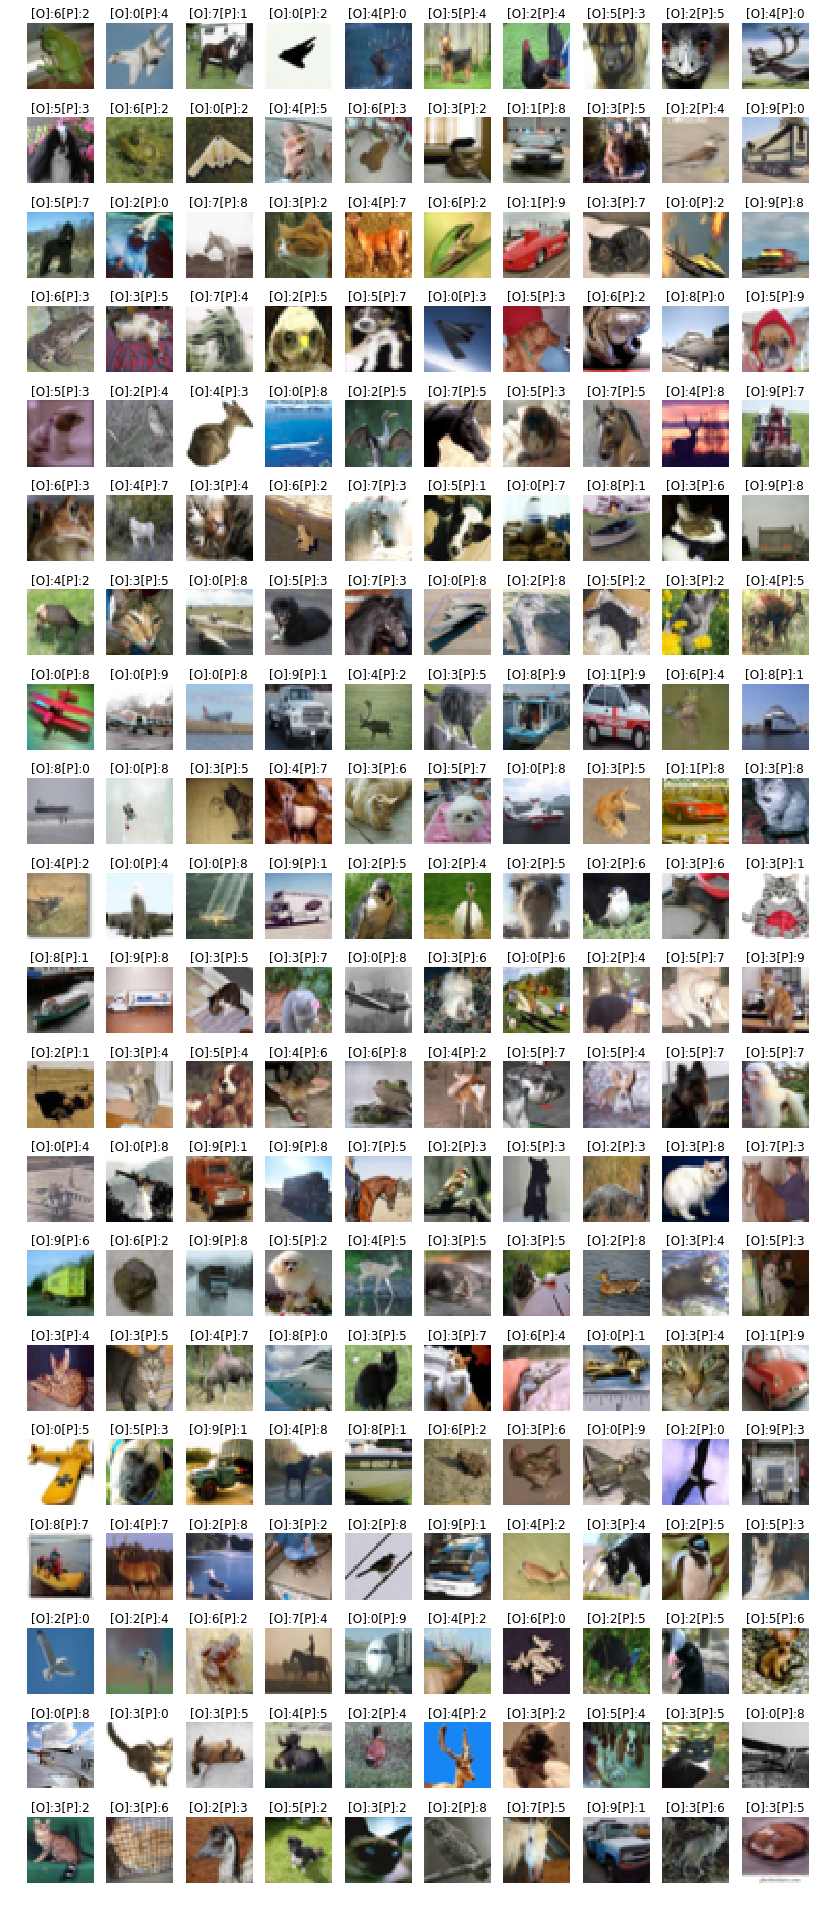

In [27]:
import numpy as np
idx = np.nonzero(pre != y_test.reshape(10000))[0]
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]

# subplot(h, w, idx)
w = 10
h = len(false_img) // w + 1
plt.figure(figsize=(14, 420))
for i, img in enumerate(false_img[:200]):
    plt.subplot(h, w, i + 1)
    t = "[O]:" + str(false_ori_label[i][0]) + "[P]:" + str(false_pre_label[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)
# trans = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat",
#         4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship",
#         9:"truck"}